# Lecture 15 - Recap

 - Will (briefly!) cover everything we've learned to date in preperation for the mid-term on Friday
 - This will be a 45 minute coding exam on your laptop, worth 20% of the grade
 - You are free to bring one double-sided page of notes and look at built-in documentation - but nothing online. **No** tutorial, stack-overflow, or ChatGPT 
 - Be sure to arrive on time - **we will start at 13:05 prompt**.


### What would you like to cover?

Class[Buzz]: `lec15-1`

## Basic syntax

In [ ]:
# The obligatory hello world...
print("Hello world!")

In [ ]:
an_integer = 9
a_float = 2.5
a_string = "blah"
a_complex_number = 2.0 + 2.3j

### Operations

In [ ]:
print(an_integer * 3)
print(a_float + 3)
print(an_integer / 4)
print(a_complex_number ** 2)
print(a_string * 2)

### Functions

In [ ]:
def say_hello(name):
    print("Hello {}!".format(name))

In [ ]:

say_hello("world")

In [ ]:
def say_hello(name, indent=0):
    padding = " "*indent
    print(padding + "Hello {}!".format(name))

In [ ]:
say_hello("Duncan", indent=4)

## Containers

### Lists

In [ ]:
assorted_stuff = ["dog", 3, 2.34, "cat"]

In [ ]:
assorted_stuff[0]

In [ ]:
assorted_stuff[1:]

In [ ]:
assorted_stuff[::-1]

### Loops

In [ ]:
for item in assorted_stuff:
    print(item)

print("Done.")

Sometimes it's useful to also have a loop counter, the `enumerate` function can do this

In [ ]:
for n, item in enumerate(assorted_stuff):
    print(item, n)

print("Done.")

### List comprehensions

We can also easily create lists programatically using loops. These are called 'list comprehensions'

In [ ]:
some_integers = [i for i in range(10)]
some_integers

In [ ]:
sum(some_integers)

### Dictionaries

In [ ]:
# A collection of key-value pairs
simple_lookup = {"red": 5, "green": 12, "blue": [0.5, 45.8]}

In [ ]:
print(simple_lookup["red"])

In [ ]:
print(simple_lookup["blue"][0])

In [ ]:
simple_lookup["orange"] = 15
print(simple_lookup)

There are other containers too, but we won't cover them here. Most useful are probably [sets](https://docs.python.org/3.5/tutorial/datastructures.html#sets) and [named tuples](https://docs.python.org/3.5/library/collections.html#collections.namedtuple).

## Logic

In [ ]:
# Simple conditional statements
variable = 0.95
if variable > 0.9:
    print("On")

In [ ]:
if variable > 0.9:
    print("On")
elif variable < 0.1:
    print("Off")
elif 0.4 < variable < 0.6:
    print("Intermediate")
else:
    print("Unknown")

In [ ]:
# Python will 'short-cut' logic statements
if "orange" in simple_lookup and simple_lookup["orange"] > 10:
    print(simple_lookup["orange"])

In [ ]:

switch = "On" if abs(variable-1.0) < 0.1 else "Off"
print(switch)

## Recursion

Recursion is useful for problems that can be broken down into smaller, similar problems. A recursive function calls itself to solve subproblems.

When using recursion, you need to define a base case to prevent infinite recursion. This is the simplest form of the problem that can be solved directly. Then you can define the recursive case, which breaks the problem down into smaller subproblems.

In [ ]:
# Example: Check if any element in the list is odd
def anyOdd(lst):
    if len(lst) == 0:  # Base case
        return False
    elif lst[0] % 2 == 1:  # If the first element is odd
        return True
    else:
        smaller = lst[1:]
        return anyOdd(smaller)

print(anyOdd([2, 4, 6, 8]))  # False
print(anyOdd([2, 4, 6, 7]))  # True


# Regular Expressions

String manipulation is a common problem when preparing data for analysis.

There are built-in `"".index()` and `"".split()` methods on strings, among others. But `re` allows us to find more complex patterns.

## Finding all instances of a pattern

You can use `re.findall()` to find all the instances of a pattern in a string. For example:

In [2]:
import re

In [3]:
# Returns a list of all matches
re.findall('match','test phrase match is in middle match')

['match', 'match']

## Pattern re Syntax

### Repetition Syntax

There are five ways to express repetition in a pattern:

    1.) A pattern followed by the meta-character * is repeated zero or more times.
    2.) Replace the * with + and the pattern must appear at least once.
    3.) Using ? means the pattern appears zero or one time.
    4.) For a specific number of occurrences, use {m} after the pattern, where m is replaced with the number of times the pattern should repeat.
    5.) Use {m,n} where m is the minimum number of repetitions and n is the maximum. Leaving out n ({m,}) means the value appears at least m times, with no maximum.


Now lets see an example of each of these:

In [4]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

print(re.findall('sd*', # s followed by zero or more d's
                 test_phrase))

['sd', 'sd', 's', 's', 'sddd', 'sddd', 'sddd', 'sd', 's', 's', 's', 's', 's', 's', 'sdddd']


In [5]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

print(re.findall('sd+', # s followed by one or more d's
                 test_phrase))

['sd', 'sd', 'sddd', 'sddd', 'sddd', 'sd', 'sdddd']


## Character Sets

Character sets are used when you wish to match any one of a group of characters at a point in the input.

Brackets are used to construct character set inputs. For example: the input `[ab]` searches for occurrences of either a or b.

Let's see some examples.

In [ ]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

print(re.findall('[sd]',        # either s or d
                 test_phrase))

In [6]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

print(re.findall('s[sd]+',        # s followed by one or more s or d
                 test_phrase))

['sdsd', 'sssddd', 'sdddsddd', 'sds', 'sssss', 'sdddd']


## Exclusion

We can use `^` to exclude terms by incorporating it into the bracket syntax notation.

For example: `[^...]` will match any single character not in the brackets.

Use `[^!.? ]` to check for matches that are not a `!,.,?,` or space.

Add the `+` to check that the match appears at least once, this basically translate into finding the words.

## Character Ranges

As character sets grow larger, typing every character that should (or should not) match could become very tedious.

A more compact format using character ranges lets you define a character set to include all of the contiguous characters between a start and stop point. The format used is `[start-end]`.

Common use cases are to search for a specific range of letters in the alphabet, such as `[a-z]` and `[A-Z]`.

## Escape Codes

You can use special escape codes to find specific types of patterns in your data, such as digits, non-digits,whitespace, and more. For example:

<table border="1" class="docutils">
<colgroup>
<col width="14%" />
<col width="86%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Code</th>
<th class="head">Meaning</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\d</span></tt></td>
<td>a digit</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\D</span></tt></td>
<td>a non-digit</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\s</span></tt></td>
<td>whitespace (tab, space, newline, etc.)</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\S</span></tt></td>
<td>non-whitespace</td>
</tr>
<tr class="row-even"><td><tt class="docutils literal"><span class="pre">\w</span></tt></td>
<td>alphanumeric</td>
</tr>
<tr class="row-odd"><td><tt class="docutils literal"><span class="pre">\W</span></tt></td>
<td>non-alphanumeric</td>
</tr>
</tbody>
</table>

In [7]:
test_phrase = 'This is a string with some numbers 1233 and a symbol #hashtag'

print(re.findall(r"\w+", # alphanumeric characters
                 test_phrase))

['This', 'is', 'a', 'string', 'with', 'some', 'numbers', '1233', 'and', 'a', 'symbol', 'hashtag']


# Numpy Recap

### Slices

Ellipsis can be specified explicitly with ```"..."```. It will automatically expand to `":"` for each of the unspecified dimensions in the array, and can even be used at the beginning of the slice:

In [8]:
import numpy as np
arr1 = np.empty((4, 6, 3))
print('Orig shape: ', arr1.shape)
print(arr1[...].shape)
print(arr1[..., 0:2].shape)
print(arr1[2:4, ..., ::2].shape)
print(arr1[2:4, :, ..., ::-1].shape)

Orig shape:  (4, 6, 3)
(4, 6, 3)
(4, 6, 2)
(2, 6, 2)
(2, 6, 3)


## Operating with arrays

It is important to remember that in general, all operations with arrays are applied *element-wise*, i.e., are applied to all the elements of the array at the same time.  For example:

In [ ]:
arr1 = np.arange(4)
arr2 = np.arange(10, 14)
print(arr1, '+', arr2, '=', arr1 + arr2)

Remember, even the multiplication operator is by default applied element-wise:

In [ ]:
print(arr1, '*', arr2, '=', arr1 * arr2)

### Broadcasting

The fact that NumPy operates on an element-wise basis means that in principle arrays must always match one another's shape. However, NumPy will also helpfully "*broadcast*" dimensions when possible.  

Here is an example of broadcasting a scalar to a 1D array:

In [ ]:
print(np.arange(3))
print(np.arange(3) + 5)

We can also broadcast a 1D array to a 2D array, in this case adding a vector to all rows of a matrix:

In [ ]:
 np.ones((3, 3)) + np.arange(3)

We can also broadcast in two directions at a time:

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a, '+', b, '=\n', a + b)

Pictorially:

![Illustration of broadcasting](./images/fig_broadcast_visual_1.png)

## Reshape and newaxis

Reshaping arrays is a common task in order to make the best of NumPy's powerful broadcasting.

A useful tip with the **``reshape``** method is that it is possible to provide a ``-1`` length for at most one of the dimensions. This indicates that NumPy should automatically calculate the length of this dimension:

In [ ]:
np.arange(6).reshape((1, -1))

In [ ]:
np.arange(6).reshape((2, -1))

Another way to increase the dimensionality of an array is to use the ``newaxis`` keyword:

In [ ]:
arr = np.arange(6)
print(arr[np.newaxis, :, np.newaxis].shape)

([image source](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html))

## Array Properties and Methods (cont.)

For multidimensional arrays it is possible to carry out computations along a single dimension by passing the `axis` parameter:

In [9]:
arr = np.arange(6).reshape((2, -1))
print('For the following array:\n', arr)
print('The max of elements along the rows is    :', arr.max(axis=1))
print('The max of elements along the columns is :', arr.max(axis=0))

For the following array:
 [[0 1 2]
 [3 4 5]]
The max of elements along the rows is    : [2 5]
The max of elements along the columns is : [3 4 5]


As you can see in this example, the value of the `axis` parameter is the dimension that will be *consumed* once the operation has been carried out.  This is why to max along the columns we use `axis=0`.  

This can be easily illustrated with an example that has more dimensions; we create an array with 4 dimensions and shape `(3,4,5,6)` and sum along the axis number 2 (i.e. the *third* axis, since in Python all counts are 0-based).  That consumes the dimension whose length was 5, leaving us with a new array that has shape `(3,4,6)`:

In [ ]:
np.zeros((3, 4, 5, 6)).sum(axis=(1, 2)).shape

Another widely used property of arrays is the `.T` attribute, which allows you to access the transpose of the array:

In [ ]:
print('Array:\n', arr)
print('Transpose:\n', arr.T)

## Element-wise Functions

NumPy ships with a full complement of mathematical functions that work on entire arrays, including logarithms, exponentials, trigonometric and hyperbolic trigonometric functions, etc.  

For example, sampling the sine function at 100 points between $0$ and $2\pi$ is as simple as:

In [14]:
x = np.linspace(0, 2*np.pi, 100)
x

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

Or to sample the exponential function between $-5$ and $5$ at intervals of $0.5$:

In [15]:
x = np.arange(-5, 5.5, 0.5)
x

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

# matplotlib recap

Matplotlib comes with a convenience sub-package called **`pyplot`**. It is a general convention to import this module as **`plt`**:

In [41]:
import matplotlib.pyplot as plt

Plot can be used to draw one or more lines in axes data space:

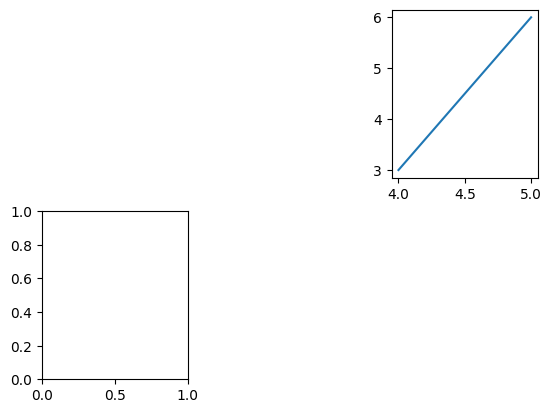

In [52]:
top_right_ax = plt.subplot(2, 3, 3)
bottom_left_ax = plt.subplot(2, 3, 4)
top_right_ax.plot([5, 4], [6, 3] )


## Further plot types

Matplotlib comes with a huge variety of different plot types. Here is a quick demonstration of the more common ones.

In [43]:
import numpy as np

In [44]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)

In [45]:
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))
data.shape

(30, 60)

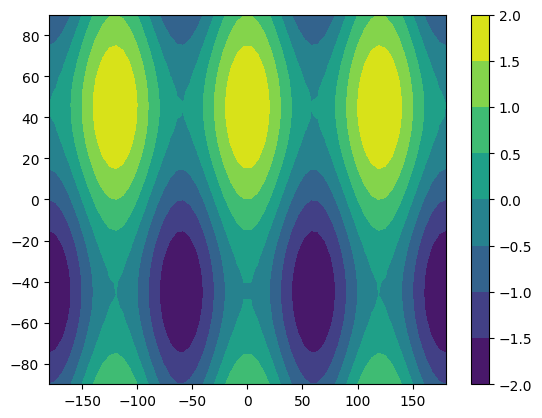

In [47]:
plt.contourf(x, y, data)
plt.colorbar()
plt.show()

In [ ]:
data.shape

In [ ]:
data.sum(axis=0)

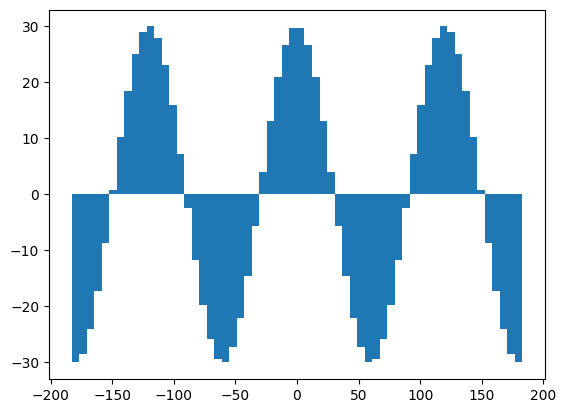

In [48]:
plt.bar(x, data.sum(axis=0), width=np.diff(x)[0])
plt.show()

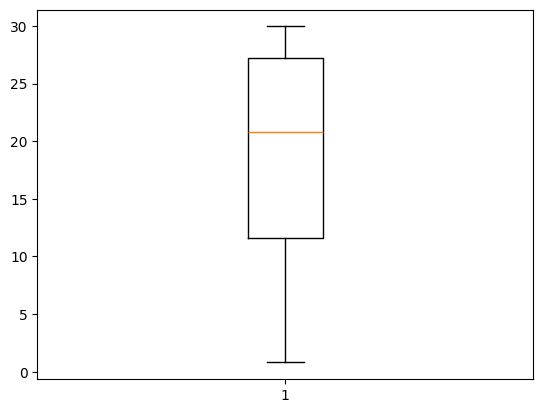

In [49]:
plt.boxplot(data.sum(axis=0)[5:15])
plt.show()

# Pandas Recap


In [16]:
import pandas as pd

## Anatomy of a DataFrame

A **DataFrame** is composed of one or more **Series**. The names of the **Series** form the column names, and the row labels form the **Index**.

In [17]:
meteorites = pd.read_csv('../data/Meteorite_Landings.csv')
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


*Source: [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)*

#### Series:

In [19]:
meteorites.recclass

0                          L5
1                          H6
2                         EH4
3                 Acapulcoite
4                          L6
                 ...         
45711                 Eucrite
45712    Pallasite, ungrouped
45713                      H4
45714                      L6
45715                    L3.7
Name: recclass, Length: 45716, dtype: object

#### Columns:

In [20]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### Index:

In [21]:
meteorites.index

RangeIndex(start=0, stop=45716, step=1)

## Creating DataFrames

We can create DataFrames from a variety of sources such as other Python objects, flat files, webscraping, and API requests. Here, we will see just a couple of examples, but be sure to check out [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) in the documentation for a complete list.

### Using a flat file

In [ ]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv')

### From scratch

Another common approach is using a dictionary as the argument to `pd.DataFrame()`

In [22]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}

pd.DataFrame(data)

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


We can also specify an index:

In [23]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}

pd.DataFrame(data, index = ['Ke', 'Julian', 'Duong', 'Andreas'])

,apples,oranges
Ke,3,0
Julian,2,3
Duong,0,7
Andreas,1,2


If we have an existing DataFrame we can also specify the index using `set_index()`

In [24]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2],
    'names': ['Ke', 'Julian', 'Duong', 'Andreas']
}

df = pd.DataFrame(data)
df

,apples,oranges,names
0,3,0,Ke
1,2,3,Julian
2,0,7,Duong
3,1,2,Andreas


In [27]:
df.set_index('names')

,apples,oranges
names,,
Ke,3,0
Julian,2,3
Duong,0,7
Andreas,1,2


### Using data from an API

Collect the data from [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) using the Socrata Open Data API (SODA) with the `requests` library:

In [ ]:
import requests

response = requests.get(
    'https://data.nasa.gov/resource/gh4g-9sfh.json',
    params={'$limit': 50_000}
)

if response.ok:
    payload = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    payload = None

Create the DataFrame with the resulting payload:

In [ ]:
import pandas as pd

df = pd.DataFrame(payload)
df.head(3)

*Tip: `df.to_csv('data.csv')` writes this data to a new file called `data.csv`.*

#### Get some information about the DataFrame

In [28]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## Extracting subsets

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks.

#### Selecting columns

We can select columns as attributes if their names would be valid Python variables:

In [ ]:
meteorites.name

If they aren't, we have to select them as keys. However, we can select multiple columns at once this way:

In [ ]:
meteorites[['name', 'mass (g)']]

#### Selecting rows

In [29]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


#### Indexing

We use `iloc[]` to select rows and columns by their position:

In [30]:
meteorites.iloc[100:104, [0, 3, 4, 6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


We use `loc[]` to select by name:

In [31]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


#### Filtering with Boolean masks

A **Boolean mask** is a array-like structure of Boolean values &ndash; it's a way to specify which rows/columns we want to select (`True`) and which we don't (`False`).

Here's an example of a Boolean mask for meteorites weighing more than 50 grams that were found on Earth (i.e., they were not observed falling):

In [32]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

**Important**: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (`&`, `|`, `~`) instead of logical operators (`and`, `or`, `not`).

We can use a Boolean mask to select the subset of meteorites weighing more than 1 million grams (1,000 kilograms or roughly 2,205 pounds) that were observed falling:

In [33]:
meteorites[(meteorites['mass (g)'] > 1e6) & (meteorites.fall == 'Fell')]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"


*Tip: Boolean masks can be used with `loc[]` and `iloc[]`.*

An alternative to this is the `query()` method:

In [ ]:
meteorites.query("`mass (g)` > 1e6 and fall == 'Fell'")

*Tip: Here, we can use both logical operators and bitwise operators.*

## Calculating summary statistics

In the next section of this workshop, we will discuss data cleaning for a more meaningful analysis of our datasets; however, we can already extract some interesting insights from the `meteorites` data by calculating summary statistics.

#### How many of the meteorites were found versus observed falling?

In [34]:
meteorites.fall.value_counts(normalize=True)

fall
Found    0.975785
Fell     0.024215
Name: proportion, dtype: float64

*Tip: Pass in `normalize=True` to see this result as percentages. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) for additional functionality.*

#### What was the mass of the average meterorite?

In [35]:
meteorites['mass (g)'].mean()

np.float64(13278.078548601512)

**Important**: The mean isn't always the best measure of central tendency. If there are outliers in the distribution, the mean will be skewed. Here, the mean is being pulled higher by some very heavy meteorites &ndash; the distribution is [right-skewed](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/).

Taking a look at some quantiles at the extremes of the distribution shows that the mean is between the 95th and 99th percentile of the distribution, so it isn't a good measure of central tendency here:

In [36]:
meteorites['mass (g)'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

0.01        0.44
0.05        1.10
0.50       32.60
0.95     4000.00
0.99    50600.00
Name: mass (g), dtype: float64

A better measure in this case is the median (50th percentile), since it is robust to outliers:

In [ ]:
meteorites['mass (g)'].median()

#### What was the mass of the heaviest meteorite?

In [37]:
meteorites['mass (g)'].idxmax()

16392

Let's extract the information on this meteorite:

In [38]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

name                             Hoba
id                              11890
nametype                        Valid
recclass                    Iron, IVB
mass (g)                   60000000.0
fall                            Found
year           01/01/1920 12:00:00 AM
reclat                      -19.58333
reclong                      17.91667
GeoLocation     (-19.58333, 17.91667)
Name: 16392, dtype: object

*Fun fact: This meteorite landed in Namibia and is a tourist attraction.*

<div>
    <img width="25%" style="margin-top: -5px; margin-bottom: -5px; min-width: 200px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Hoba_meteorite_%2815682150765%29.jpg/1280px-Hoba_meteorite_%2815682150765%29.jpg" alt="Hoba meteorite (source: Wikipedia)"/>
    <div><small><em>Source: Wikipedia</em></small></div>
</div>

#### How many different types of meteorite classes are represented in this dataset?

In [ ]:
meteorites.recclass.nunique()

#### Get some summary statistics on the data itself
We can get common summary statistics for all columns at once. By default, this will only be numeric columns, but here, we will summarize everything together:

In [ ]:
meteorites.describe(include='all')

## Group-by operations

Rather than perform aggregations, like `mean()` or `describe()`, on the full dataset at once, we can perform these calculations per group by first calling `groupby()`:

In [ ]:
import numpy as np
meteorites.groupby('recclass').describe(include=np.number)

In [39]:
meteorites.groupby('recclass')['mass (g)'].mean().head()

recclass
Acapulcoite               490.424407
Acapulcoite/Lodranite      31.793333
Acapulcoite/lodranite      44.933333
Achondrite-prim          1078.000000
Achondrite-ung            895.845614
Name: mass (g), dtype: float64

In [40]:
meteorites.groupby('recclass').agg({'mass (g)':['mean', 'std'], 'name': ['count']}).head()

mass (g)               name
                              mean          std count
recclass                                             
Acapulcoite             490.424407  1279.406632    54
Acapulcoite/Lodranite    31.793333    26.215771     6
Acapulcoite/lodranite    44.933333    73.678106     3
Achondrite-prim        1078.000000  1246.035613     9
Achondrite-ung          895.845614  2217.850529    57